<img src="Logo.jpg" style="width:250px;height:250px"/>

# <center>PROYECTO FINAL - Managerial Statistics</center>


Elaborado por: Alejandro Ramirez 

Carnet: 201555
## Fuente

El presente proyecto se basa en el análisis estadístico de una base de datos extraída de la fuente del sitio de [Kaggle](https://www.kaggle.com/spscientist/students-performance-in-exams). La fuente de datos no especifica más detalle acerca de dónde son los datos o qué signfica alguno de los datos categóricos, por lo tanto, podemos inferir que son las notas de matemáticas, lectura y escritura en alguna universidad. Adicional, está categorizado por Género: Female y male; por Raza: grupo A, grupo B, grupo C, grupo D, grupo E; nivel de educación: associate's degree, bachelor's degree, high school, master's degree, some college, some high school.


### PREGUNTAS DE INVESTIGACIÓN
La investigación, publicada en el British Journal of Psychology, establece que las representantes del sexo femenino son más inteligentes hasta los 16 años; entre esa edad y los 21 el nivel se empareja y después, ellos las superan. 

Según los resultados de los examenes de este dataset, ¿Los hombres son más inteligentes que las mujeres en matemáticas? ¿Hay alguna diferencia en la nota de matemática, si el tipo de alimentación del estudiante o existe alguna diferencia en la nota de matemática si el estudiante se preparó para el examen o no?

<img src="man vs woman.jpg" style="width:250px;height:250px"/>

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

### Lectura del archivo
Vamos a leer el archivo con la información de nuestro dataset. Al archivo original le vamos a modificar el nombre de las columnas, reemplazando el espacio por _. Esto con el objetivo de no tener inconvenientes en las funciones.

In [216]:
da = pd.read_csv("../PROYECTO FINAL/StudentsPerformance.csv")
da.columns = da.columns.str.replace(" ","_")
da.head(10)

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


Obtenemos los valores distintos de las variables gender, lunch, test_preparation_course, parenta_level_of_education y race/ethnicity

In [203]:
da.gender.unique()

array(['female', 'male'], dtype=object)

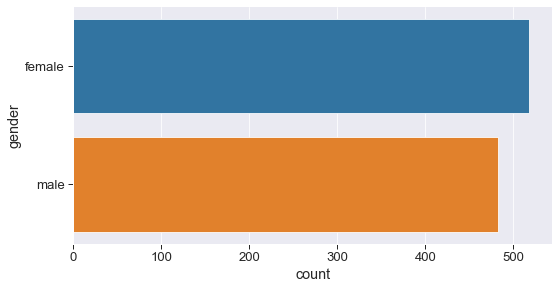

In [270]:
sns.catplot(y="gender",  kind="count", height=4, aspect=2, data=da);

In [207]:
da["race/ethnicity"].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

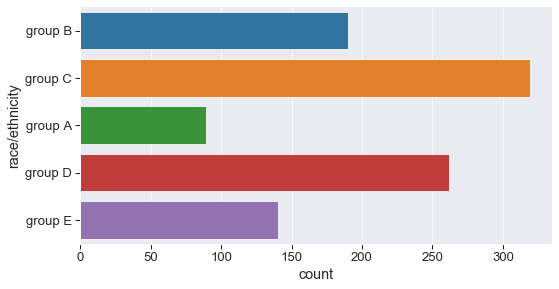

In [269]:
sns.catplot(y="race/ethnicity",  kind="count", height=4, aspect=2, data=da);


In [208]:
da["parental_level_of_education"].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

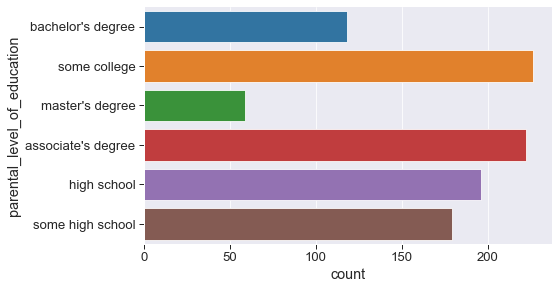

In [272]:
sns.catplot(y="parental_level_of_education",  kind="count", height=4, aspect=2, data=da);

In [209]:
da["lunch"].unique()

array(['standard', 'free/reduced'], dtype=object)

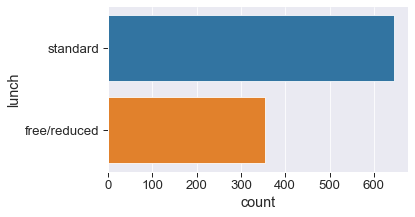

In [274]:
sns.catplot(y="lunch",  kind="count", height=3, aspect=2, data=da);

In [210]:
da["test_preparation_course"].unique()

array(['none', 'completed'], dtype=object)

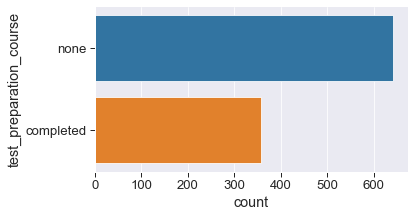

In [277]:
sns.catplot(y="test_preparation_course",  kind="count", height=3, aspect=2, data=da);

## Gráficas
Gráficamente podemos analizar el comportamiento de la data. En las siguientes gráficas, podemos observar la distribución de las variables de las notas de matemática, escritura y lectura. 

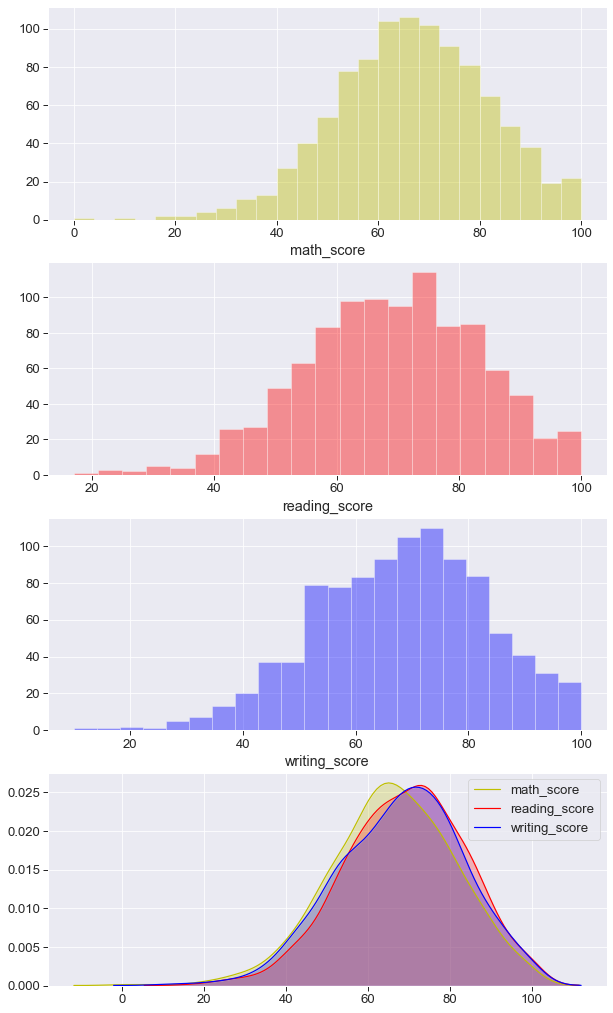

In [135]:
sns.set_style("darkgrid", {'xtick.bottom': True, 'ytick.left': True})
sns.set_context("paper", font_scale=1.5) 
fig, ax = plt.subplots(4,1, figsize=(10,18))
sns.distplot(da.math_score, ax = ax[0], color = 'y', kde = False)
sns.distplot(da.reading_score, ax = ax[1], color = 'r', kde = False)
sns.distplot(da.writing_score, ax = ax[2], color = 'b', kde = False)
sns.kdeplot(da.math_score, ax = ax[3], color = 'y', shade= True)
sns.kdeplot(da.reading_score, ax = ax[3], color = 'r', shade= True)
sns.kdeplot(da.writing_score, ax = ax[3], color = 'b', shade= True)

La distribución de la gráfica es normal por cada una de las variables. Graficamente podemos observar que para la gráfica de math_score el punto medio está aproximadamente en 65, para la gráfica de reading_score y writing_scor el punto medio estaría aproxixadamente en 70

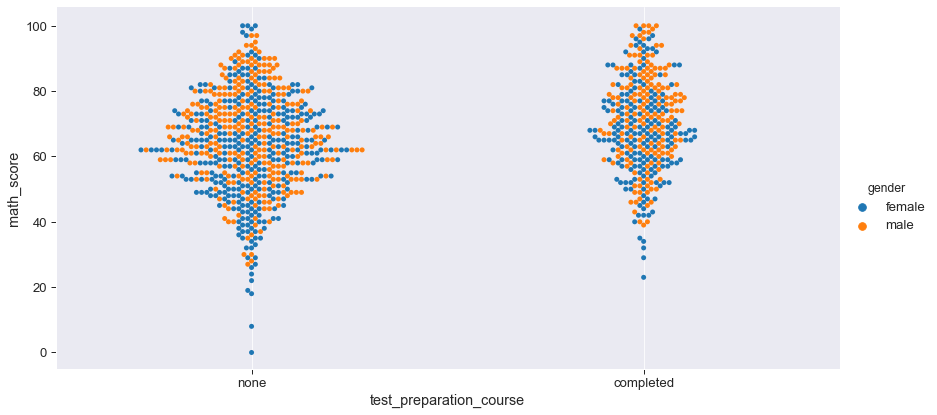

In [291]:
sns.catplot(x="test_preparation_course", y="math_score", data=da, height=6, aspect=2, kind='swarm', hue='gender');
plt.grid()

La gráfica de arriba indica el efecto de un test de preparación entre hombre y mujeres. Arriba de 20 es la nota de matemáticas para lo que completaron el curso, mientras que hay 4 mujeres que sacaron menor a 20 cuando no completaron el curso.

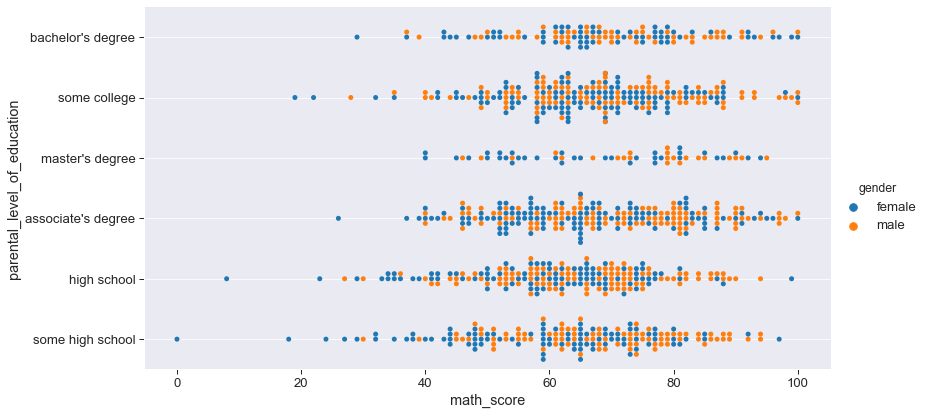

In [293]:
sns.catplot(y="parental_level_of_education", x="math_score", data=da, height=6, aspect=2, kind='swarm', hue='gender');
plt.grid()

¿Puede influenciar el grado académico en los hijos en la notas de matemática? Según la estadística, independientemente del grado académico de los padres, existen valores distribuidos en todos los grupos. Sin embargo, cabe resaltar que los padres con master degree existen menos datos pero arriba de 40 puntos. Se puede observar que a nivel general los valores más bajos lo tienen las mujeres.

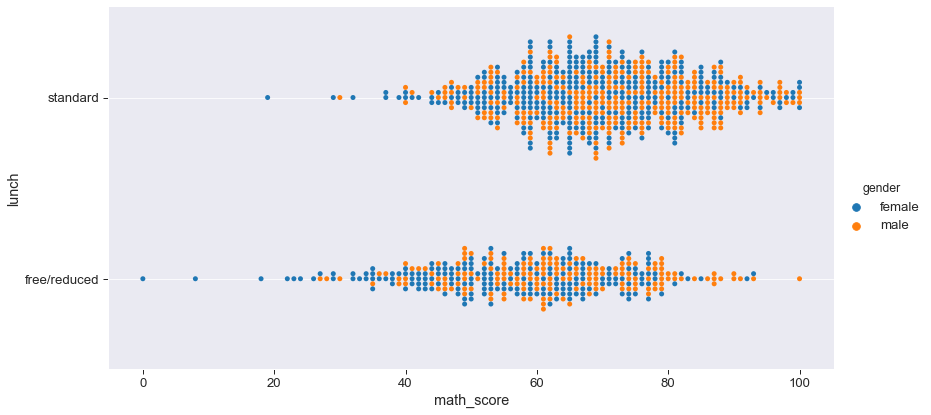

In [288]:
sns.catplot(y="lunch", x="math_score", data=da, height=6, aspect=2, kind='swarm', hue='gender');
plt.grid()

¿El tipo de comida que tiene un estudiante puede influenciar en la nota de matemáticas? Se puede observar que para el tipo de comida standard el mínimo de una nota es de 20 y existe una mayor concentración de los datos. Se observa que en ambos casos las notas más bajas son de mujeres.

## Descripción de la data
A continuación se describe la data para obtener exactamente la media, cantidad de registros, el mínimo y máximos, la variancia y los percentiles de las variables. La media para las notas de math es de 66, la media para la nota de reading es de 69 y la media para writing es de 68. 

In [38]:
da.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## MODELO DE REGRESION MULTIPLE
Vamos a desarrollar un modelo para predecir la nota de matemáticas para una población de estudiantes. 

## Variables

### Variables discretas:
* math_score 
* reading_score 
* writing_score. 

### Variables categóricas:
* gender
* race/ethnicity
* parenta_level_education
* lunch
* test_preparation_course. 

Analizaremos la correlación de las variablas discretas

In [202]:
model = sm.OLS.from_formula("math_score ~ writing_score + reading_score ", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1031.
Date:                Sun, 17 May 2020   Prob (F-statistic):          2.25e-243
Time:                        15:28:51   Log-Likelihood:                -3576.9
No. Observations:                1000   AIC:                             7160.
Df Residuals:                     997   BIC:                             7175.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.5241      1.328      5.665      0.000       4.918      10.131
writing_score     0.2494      0.061      4.118      0.000       0.131       0.368
reading_score     0.6013      0.063      9.538      0.000       0.478       0.725
==============================================================================
Omnibus:                       10.227   Durbin-Watson:                   2.087
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.801
Skew:                           0.006   Prob(JB):                       0.0334
Kurtosis:                       2.596   Cond. No.                         481.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

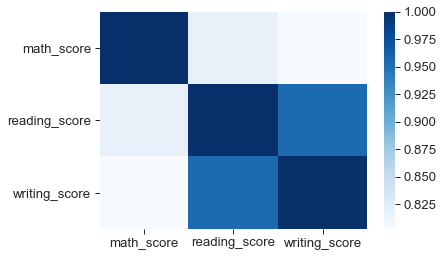

In [217]:
sns.heatmap(da.corr(), cmap="Blues")

El grado del modelo de regresión múltiple que hemos encontrado a partir de un conjunto de observaciones, explica las variaciones que se producen en la variable dependiente de éstas. Es decir, el modelo de regresión sólo nos explica un 67% de la variabilidad total de las observaciones.


Observamos que existe una correlación fuerte y positiva entre las variables de math_score, reading_score y writing_score.

Ajustamos el modelo para validar si existe algún cambio en la correlación si agregamos las variables discretas siguientes: gender, lunch y test_reparation_course. Descartaremos las otras variables categóricas ya que contienen múltiples valores.


In [215]:
da2 = pd.read_csv("../PROYECTO FINAL/StudentsPerformance.csv")
da2.columns = da2.columns.str.replace(" ","_")
da2 = pd.get_dummies(da2, columns = ["gender"], drop_first = True)
da2 = pd.get_dummies(da2, columns = ["lunch"], drop_first = True)
da2 = pd.get_dummies(da2, columns = ["test_preparation_course"], drop_first = True)
da2.head(10)

,race/ethnicity,parental_level_of_education,math_score,reading_score,writing_score,gender_male,lunch_standard,test_preparation_course_none
0,group B,bachelor's degree,72,72,74,0,1,1
1,group C,some college,69,90,88,0,1,0
2,group B,master's degree,90,95,93,0,1,1
3,group A,associate's degree,47,57,44,1,0,1
4,group C,some college,76,78,75,1,1,1
5,group B,associate's degree,71,83,78,0,1,1
6,group B,some college,88,95,92,0,1,0
7,group B,some college,40,43,39,1,0,1
8,group D,high school,64,64,67,1,0,0
9,group B,high school,38,60,50,0,0,1


Para las variables:
* gender_male: 1 = male, 0 = female
* lunch_standard: 1 = standard, 0 = free/reduced
* test_preparation_non: 1 = none, 0 = completed

In [253]:
model = sm.OLS.from_formula("math_score ~ writing_score + reading_score + gender_male + lunch_standard + test_preparation_course_none", data=da2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math_score   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1250.
Date:                Sun, 17 May 2020   Prob (F-statistic):               0.00
Time:                        21:02:37   Log-Likelihood:                -3144.2
No. Observations:                1000   AIC:                             6300.
Df Residuals:                     994   BIC:                             6330.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                      -10.3683      1.089     -9.520      0.000     -12.506      -8.231
writing_score                    0.6401      0.043     14.862      0.000       0.556       0.725
reading_score                    0.3219      0.043      7.559      0.000       0.238       0.405
gender_male                     13.1981      0.385     34.259      0.000      12.442      13.954
lunch_standard                   3.5188      0.389      9.040      0.000       2.755       4.283
test_preparation_course_none     3.1201      0.407      7.670      0.000       2.322       3.918
==============================================================================
Omnibus:                        0.469   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.791   Jarque-Bera (JB):                0.530
Skew:                          -0.048   Prob(JB):                        0.767
Kurtosis:                       2.940   Cond. No.                         626.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

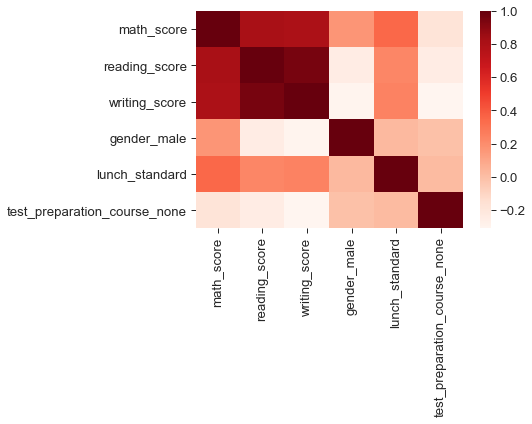

In [213]:
sns.heatmap(da2.corr(), cmap="Reds")

Vemos que el modelo se ajusta mejor agregando las variables categóricas. El modelo de regresión sólo nos explica un 86% de la variabilidad total de las observaciones, lo que es mayor a un 67% de lo que teníamos anteriormente. Un estudiante de género masculino tendrá 13 unidades mayor en la nota de mate que una mujer. También podemos observar, que un estudiante que tenga una comida stardard tendrá 3.5 unidades más en la nota de matemáticas que un estudiante con una comida pobre o reducida. Curiosamente, los estudiantes que no completaron el test_preparation_course tendrán 3 unidades más en la nota de matemáticas. Aunque las correlaciones entre estas tres variables no son fuertes, es suficiente para inducir diferencias substanciales en los coeficientes de regresion. 

## Predicción

Nuestra fórmula para la predicción de nuestro modelo es la siguiente:

### Y = a (writing_score) + b(reading_score) + c(gender_male) + d(lunch_standard) + e(test_preparation_course_none) + f


### Y = 0.64(writing_score) + 0.32(reading_score) + 13.2(gender_male) + 3.52(lunch_standard) + 3.12(test_preparation_course_none) - 10.37

Si deseamos predecir la nota matemática Male_Math_Score para un estudiante masculino donde los valores son:
    
* writing_score = 72
* reading_score = 80
* gender_male = 1
* lunch_standard = 1
* test_preparation_course_none = 0 

In [248]:
Male_Math_Score = 0.64*70 + 0.32*30 + 13.2*1 + 3.52*1 + 3.12*0 - 10.37
Male_Math_Score

60.75000000000001

Si deseamos predecir la nota matemática Female_Math_Score para un estudiante femenino donde los valores son:
    
* writing_score = 72
* reading_score = 80
* gender_male = 0
* lunch_standard = 1
* test_preparation_course_none = 0 

In [249]:
Female_Math_Score = 0.64*70 + 0.32*30 + 13.2*0 + 3.52*1 + 3.12*0 - 10.37
Female_Math_Score

47.55000000000001

In [247]:
Diferencia = Male_Math_Score - Female_Math_Score
Diferencia

13.199999999999996

## Conclusiones

El modelo predice la nota de matemáticas para este set de datos, a partir de las notas de reading y writing, y si el estudiante es femenino/masculino, el tipo de comida standard/reduce y si completó el test de preparación. Los valores de una nota van de 0 a 100 puntos.

1. Se ha realizado un modelo de regresión multiple, convirtiendo variables categóricas para el ajuste del modelo.
2. El modelo indica que con un 95% de confianza, el cambio del valor de género es 13.2 puntos para hombres, con una estimación entre 12.442 y 13.954.
3. Con un 95% de confianza, el tipo de comida afecta en un 3.52 puntos; el tipo de preparación que no se completó afecta con 3.12.
5. Podemos concluir que para este estudio los hombres son más inteligentes en matemática.

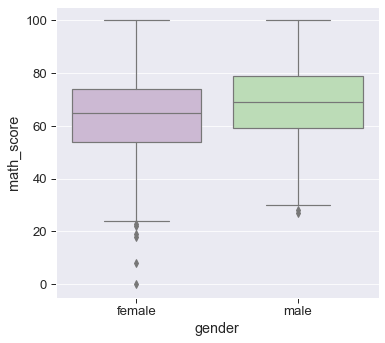

In [287]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'gender', y = 'math_score', data = da,palette = "PRGn")
plt.tight_layout()
plt.show()